In [1]:
get_ipython().system('pip install db-dtypes')

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [4]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [5]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [6]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [7]:
data.describe()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
count,16833.0,16833.0,16833.0,16833.0,16833.0,13748.0,5942.0,6036.0,3246.0,12031.0,3835.0,3931.0,15868.0,15285.0,14939.0,7124.0,10089.0,16426.0,8075.0,6392.0
mean,20220540.093329,21.329531,18088.919682,211605.900315,22.952712,0.050989,1.291148,19.319583,16.923598,0.131992,18.957757,19.689138,0.005546,0.010926,0.014057,10.738069,0.207156,0.0,0.504396,17.312735
std,268.366832,11.618554,41.019467,288715.02492,14.583655,1.05481,5.320218,12.554864,10.889373,1.772384,11.939064,12.093698,0.454213,0.49316,0.568924,15.92762,2.51169,0.0,3.353956,11.623372
min,20220101.0,1.0,18001.0,100.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20220312.0,11.0,18063.0,10100.0,14.0,0.0,0.0,12.0,11.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,20220528.0,22.0,18095.0,42801.0,18.0,0.0,0.0,15.0,14.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
75%,20220806.0,32.0,18103.0,342600.0,27.0,0.0,0.0,22.0,20.0,0.0,22.0,23.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,21.0
max,20220910.0,37.0,18183.0,976400.0,170.0,41.0,78.0,137.0,154.0,60.0,126.0,139.0,49.0,36.0,41.0,163.0,110.0,0.0,74.0,155.0


In [8]:
data.shape

(16833, 25)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [10]:
y=data['total_claims']

In [11]:
l=[]
for i in data.columns:
    if sum(data[i].isnull())>0:
        l.append(i)
        print('The null values in',i,'are',sum(data[i].isnull()))      

The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race_white are 10441


In [12]:
data.isnull().sum(axis=0)

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [13]:
data=data.drop('total_claims',axis=1)

In [14]:
l=[]
for i in data.columns:
    if sum(data[i].isnull())>0:
        l.append(i)
        print('The null values in',i,'are',sum(data[i].isnull()))      

The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race_white are 10441


In [15]:
data.isnull().sum(axis=0)

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [16]:
for i in data.columns:
    print('The unique values in',i,'are',len(data[i].value_counts()))

The unique values in uu_id are 525
The unique values in timeperiod are 35
The unique values in week_number are 35
The unique values in countyfips are 60
The unique values in tract are 425
The unique values in tract_name are 525
The unique values in edu_8th_or_less are 17
The unique values in edu_grades_9_11 are 39
The unique values in edu_hs_grad_equiv are 94
The unique values in edu_post_hs are 67
The unique values in edu_unknown are 25
The unique values in top_category_employer1 are 21
The unique values in top_category_employer2 are 22
The unique values in top_category_employer3 are 22
The unique values in gender_female are 80
The unique values in gender_male are 79
The unique values in gender_na are 4
The unique values in race_amerindian are 8
The unique values in race_asian are 11
The unique values in race_black are 97
The unique values in race_noanswer are 30
The unique values in race_hawaiiannative are 1
The unique values in race_other are 33
The unique values in race_white are 7

In [17]:
query = """
SELECT * FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [18]:
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [19]:
data.describe()

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
count,16833.0,16833.0,16833.0,16833.0,16833.0,13748.0,5942.0,6036.0,3246.0,12031.0,3835.0,3931.0,15868.0,15285.0,14939.0,7124.0,10089.0,16426.0,8075.0,6392.0
mean,20220540.093329,21.329531,18088.919682,211605.900315,22.952712,0.050989,1.291148,19.319583,16.923598,0.131992,18.957757,19.689138,0.005546,0.010926,0.014057,10.738069,0.207156,0.0,0.504396,17.312735
std,268.366832,11.618554,41.019467,288715.02492,14.583655,1.05481,5.320218,12.554864,10.889373,1.772384,11.939064,12.093698,0.454213,0.49316,0.568924,15.92762,2.51169,0.0,3.353956,11.623372
min,20220101.0,1.0,18001.0,100.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,20220312.0,11.0,18063.0,10100.0,14.0,0.0,0.0,12.0,11.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,20220528.0,22.0,18095.0,42801.0,18.0,0.0,0.0,15.0,14.0,0.0,15.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
75%,20220806.0,32.0,18103.0,342600.0,27.0,0.0,0.0,22.0,20.0,0.0,22.0,23.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,21.0
max,20220910.0,37.0,18183.0,976400.0,170.0,41.0,78.0,137.0,154.0,60.0,126.0,139.0,49.0,36.0,41.0,163.0,110.0,0.0,74.0,155.0


In [20]:
data.shape

(16833, 25)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [22]:
y=data['total_claims']

data=data.drop('total_claims',axis=1)

In [23]:
l=[]
for i in data.columns:
    if sum(data[i].isnull())>0:
        l.append(i)
        print('The null values in',i,'are',sum(data[i].isnull()))      

The null values in edu_8th_or_less are 3085
The null values in edu_grades_9_11 are 10891
The null values in edu_hs_grad_equiv are 10797
The null values in edu_post_hs are 13587
The null values in edu_unknown are 4802
The null values in gender_female are 12998
The null values in gender_male are 12902
The null values in gender_na are 965
The null values in race_amerindian are 1548
The null values in race_asian are 1894
The null values in race_black are 9709
The null values in race_noanswer are 6744
The null values in race_hawaiiannative are 407
The null values in race_other are 8758
The null values in race_white are 10441


In [24]:
data.isnull().sum(axis=0)

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [25]:
for i in data.columns:
    print('The unique values in',i,'are',len(data[i].value_counts()))

The unique values in uu_id are 525
The unique values in timeperiod are 35
The unique values in week_number are 35
The unique values in countyfips are 60
The unique values in tract are 425
The unique values in tract_name are 525
The unique values in total_claims are 120
The unique values in edu_8th_or_less are 17
The unique values in edu_grades_9_11 are 39
The unique values in edu_hs_grad_equiv are 94
The unique values in edu_post_hs are 67
The unique values in edu_unknown are 25
The unique values in top_category_employer1 are 21
The unique values in top_category_employer2 are 22
The unique values in top_category_employer3 are 22
The unique values in gender_female are 80
The unique values in gender_male are 79
The unique values in gender_na are 4
The unique values in race_amerindian are 8
The unique values in race_asian are 11
The unique values in race_black are 97
The unique values in race_noanswer are 30
The unique values in race_hawaiiannative are 1
The unique values in race_other ar

In [26]:
data.corr()

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14594/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
timeperiod,1.000000,0.997239,-0.000939,-0.007423,-0.053561,0.022095,-0.020593,0.017385,-0.000578,-0.005404,-0.010375,0.020834,-0.000295,-0.003248,-0.014569,-0.081809,0.008955,NaN,0.017405,0.039299
week_number,0.997239,1.000000,-0.001015,-0.007765,-0.054817,0.021323,-0.021588,0.016370,0.001342,-0.005644,-0.008109,0.019749,-0.000070,-0.003663,-0.013924,-0.080145,0.008790,NaN,0.015683,0.036291
countyfips,-0.000939,-0.001015,1.000000,0.014993,-0.011242,-0.004784,0.003066,-0.039252,-0.048220,0.011492,-0.054918,-0.081006,-0.007179,0.005258,-0.018302,0.009645,-0.000593,NaN,-0.018666,-0.071035
tract,-0.007423,-0.007765,0.014993,1.000000,-0.041477,0.044356,-0.003742,-0.031720,-0.087579,0.006510,-0.016188,-0.009555,0.009147,0.003021,0.000662,-0.182185,-0.016876,NaN,-0.048066,0.002251
total_claims,-0.053561,-0.054817,-0.011242,-0.041477,1.000000,0.084509,0.480994,0.863481,0.629552,0.145159,0.767174,0.783093,0.020799,0.047452,0.041353,0.795195,0.254839,NaN,0.342631,0.683659
edu_8th_or_less,0.022095,0.021323,-0.004784,0.044356,0.084509,1.000000,0.014350,0.015608,-0.036702,-0.003891,0.052109,0.089749,-0.000671,-0.001192,0.014588,0.002723,0.051517,NaN,0.063414,0.133392
edu_grades_9_11,-0.020593,-0.021588,0.003066,-0.003742,0.480994,0.014350,1.000000,0.253993,0.086384,0.001510,0.437756,0.310162,-0.004423,-0.006219,0.064117,0.368575,0.125368,NaN,0.218931,0.363411
edu_hs_grad_equiv,0.017385,0.016370,-0.039252,-0.031720,0.863481,0.015608,0.253993,1.000000,0.109291,0.042798,0.632486,0.685100,NaN,0.028791,0.036650,0.689628,0.278505,NaN,0.322453,0.488501
edu_post_hs,-0.000578,0.001342,-0.048220,-0.087579,0.629552,-0.036702,0.086384,0.109291,1.000000,-0.003240,0.449063,0.428841,0.063897,0.044894,0.022885,0.506582,0.186814,NaN,0.177574,0.392262
edu_unknown,-0.005404,-0.005644,0.011492,0.006510,0.145159,-0.003891,0.001510,0.042798,-0.003240,1.000000,0.101526,0.090135,-0.000910,-0.001769,-0.001627,0.099446,0.014374,NaN,0.118185,0.058228


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14594/1666615269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


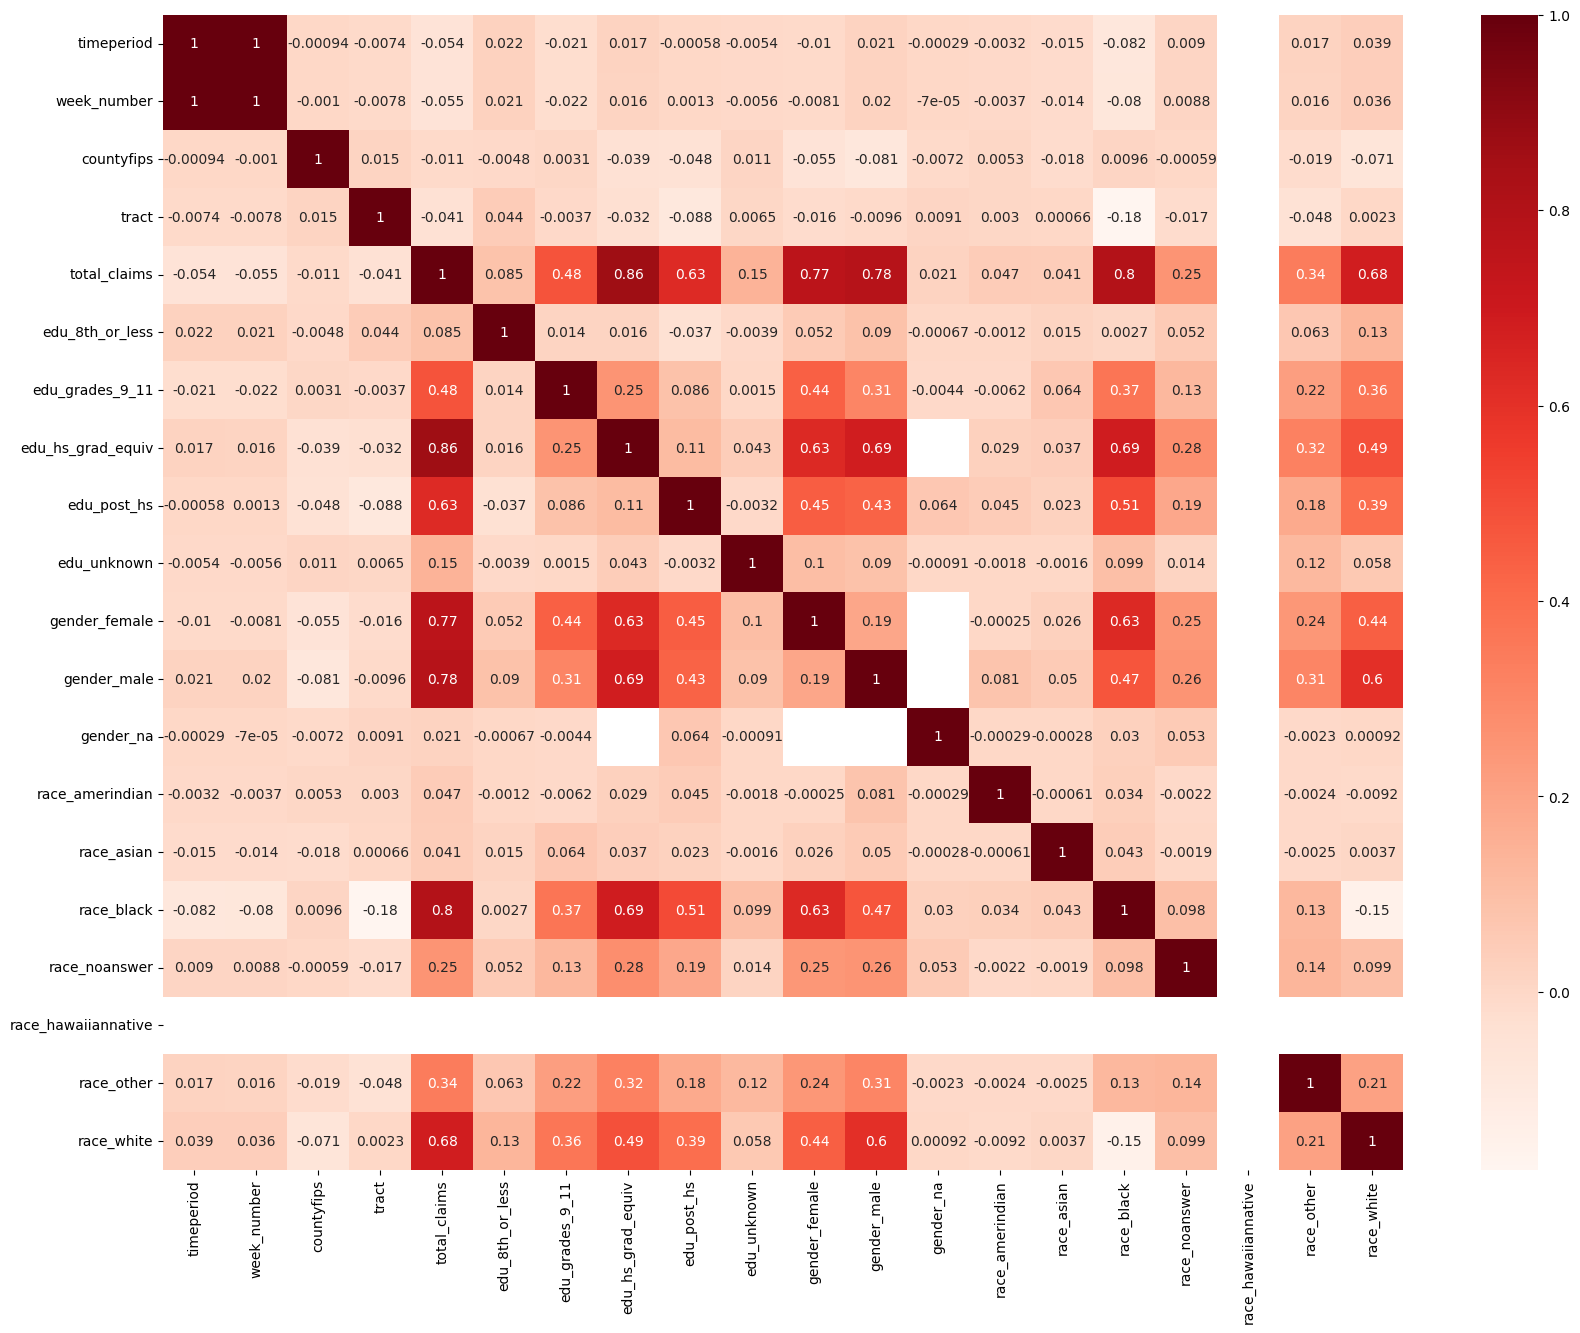

In [27]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
for i in data.columns:
    if data[i].isnull().sum()>= 0.5*len(data)
    data=data.drop(i,axis=1)

SyntaxError: invalid syntax (1905098905.py, line 2)

In [29]:
for i in data.columns:
    if data[i].isnull().sum()>= 0.5*len(data):
        data=data.drop(i,axis=1)

In [30]:
data.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_na', 'race_amerindian', 'race_asian',
       'race_noanswer', 'race_hawaiiannative'],
      dtype='object')

In [31]:
data.isnull().sum(axis=0)

uu_id                        0
timeperiod                   0
week_number                  0
countyfips                   0
tract                        0
tract_name                   0
total_claims                 0
edu_8th_or_less           3085
edu_unknown               4802
top_category_employer1       0
top_category_employer2       0
top_category_employer3       0
gender_na                  965
race_amerindian           1548
race_asian                1894
race_noanswer             6744
race_hawaiiannative        407
dtype: int64

In [32]:
for i in data.columns:
    if data[i].isnull().sum()>= 0.4*len(data):
        data=data.drop(i,axis=1)

In [33]:
data.isnull().sum(axis=0)

uu_id                        0
timeperiod                   0
week_number                  0
countyfips                   0
tract                        0
tract_name                   0
total_claims                 0
edu_8th_or_less           3085
edu_unknown               4802
top_category_employer1       0
top_category_employer2       0
top_category_employer3       0
gender_na                  965
race_amerindian           1548
race_asian                1894
race_hawaiiannative        407
dtype: int64

In [34]:
for i in data.columns:
    if data[i].isnull().sum()>= 0.3*len(data):
        data=data.drop(i,axis=1)

In [35]:
data.isnull().sum(axis=0)

uu_id                        0
timeperiod                   0
week_number                  0
countyfips                   0
tract                        0
tract_name                   0
total_claims                 0
edu_8th_or_less           3085
edu_unknown               4802
top_category_employer1       0
top_category_employer2       0
top_category_employer3       0
gender_na                  965
race_amerindian           1548
race_asian                1894
race_hawaiiannative        407
dtype: int64

In [36]:
for i in data.columns:
    if data[i].isnull().sum()>= 0.4*len(data):
        data=data.drop(i,axis=1)

In [37]:
data.isnull().sum(axis=0)

uu_id                        0
timeperiod                   0
week_number                  0
countyfips                   0
tract                        0
tract_name                   0
total_claims                 0
edu_8th_or_less           3085
edu_unknown               4802
top_category_employer1       0
top_category_employer2       0
top_category_employer3       0
gender_na                  965
race_amerindian           1548
race_asian                1894
race_hawaiiannative        407
dtype: int64

In [38]:
for i in data.columns:
    print('The unique values in',i,'are',len(data[i].value_counts()))

The unique values in uu_id are 525
The unique values in timeperiod are 35
The unique values in week_number are 35
The unique values in countyfips are 60
The unique values in tract are 425
The unique values in tract_name are 525
The unique values in total_claims are 120
The unique values in edu_8th_or_less are 17
The unique values in edu_unknown are 25
The unique values in top_category_employer1 are 21
The unique values in top_category_employer2 are 22
The unique values in top_category_employer3 are 22
The unique values in gender_na are 4
The unique values in race_amerindian are 8
The unique values in race_asian are 11
The unique values in race_hawaiiannative are 1


In [39]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(data[i].value_counts())

0     13711
18        5
16        5
19        4
10        3
12        3
21        3
24        2
14        2
33        2
11        2
17        1
28        1
41        1
13        1
26        1
37        1
Name: edu_8th_or_less, dtype: Int64
0     11948
11       10
14        9
13        7
10        7
12        6
21        4
18        4
29        4
17        3
15        3
35        3
20        3
27        3
26        3
28        2
22        2
16        2
31        2
46        1
19        1
36        1
60        1
24        1
48        1
Name: edu_unknown, dtype: Int64
0     15865
12        1
27        1
49        1
Name: gender_na, dtype: Int64
0     15276
14        2
26        2
13        1
36        1
11        1
10        1
17        1
Name: race_amerindian, dtype: Int64
0     14928
13        2
26        1
21        1
10        1
19        1
20        1
24        1
12        1
41        1
11        1
Name: race_asian, dtype: Int64
0    16426
Name: race_hawaiiannative, dtype: Int64


In [40]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print('The value counts of feature',i
        print(data[i].value_counts())

SyntaxError: invalid syntax (147765342.py, line 4)

In [41]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print('The value counts of feature',i)
        print(data[i].value_counts())

The value counts of feature edu_8th_or_less
0     13711
18        5
16        5
19        4
10        3
12        3
21        3
24        2
14        2
33        2
11        2
17        1
28        1
41        1
13        1
26        1
37        1
Name: edu_8th_or_less, dtype: Int64
The value counts of feature edu_unknown
0     11948
11       10
14        9
13        7
10        7
12        6
21        4
18        4
29        4
17        3
15        3
35        3
20        3
27        3
26        3
28        2
22        2
16        2
31        2
46        1
19        1
36        1
60        1
24        1
48        1
Name: edu_unknown, dtype: Int64
The value counts of feature gender_na
0     15865
12        1
27        1
49        1
Name: gender_na, dtype: Int64
The value counts of feature race_amerindian
0     15276
14        2
26        2
13        1
36        1
11        1
10        1
17        1
Name: race_amerindian, dtype: Int64
The value counts of feature race_asian
0     14928
1

In [42]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print('The value counts of feature',i)
        print(data[i].value_counts(),'\n')

The value counts of feature edu_8th_or_less
0     13711
18        5
16        5
19        4
10        3
12        3
21        3
24        2
14        2
33        2
11        2
17        1
28        1
41        1
13        1
26        1
37        1
Name: edu_8th_or_less, dtype: Int64 

The value counts of feature edu_unknown
0     11948
11       10
14        9
13        7
10        7
12        6
21        4
18        4
29        4
17        3
15        3
35        3
20        3
27        3
26        3
28        2
22        2
16        2
31        2
46        1
19        1
36        1
60        1
24        1
48        1
Name: edu_unknown, dtype: Int64 

The value counts of feature gender_na
0     15865
12        1
27        1
49        1
Name: gender_na, dtype: Int64 

The value counts of feature race_amerindian
0     15276
14        2
26        2
13        1
36        1
11        1
10        1
17        1
Name: race_amerindian, dtype: Int64 

The value counts of feature race_asian
0    